<a href="https://colab.research.google.com/github/MohanPatil1/DS-And-DA-Assignments/blob/main/S_AT_Waist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Data Set

In [1]:
import pandas as pd
data=pd.read_csv('WC_AT.csv')
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [2]:
data

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


#Correlation

In [4]:
data.corr()#Check Waist vs AT

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


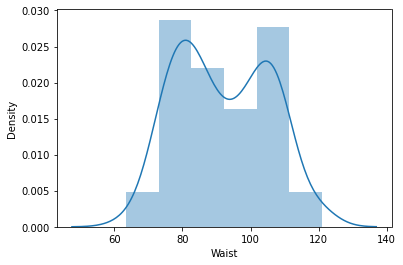

In [5]:
import seaborn as sns
sns.distplot(data['Waist'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


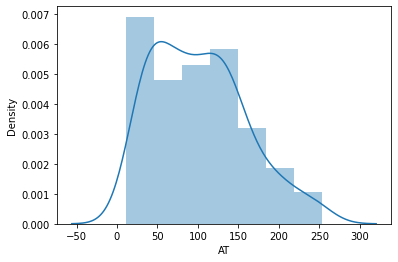

In [6]:
sns.distplot(data['AT'])

#Fitting a Linear Regression Model

In [7]:
import statsmodels.formula.api as smf#model -Regresion model
model=smf.ols('AT~Waist',data=data).fit()#Ordinary least Squares, y=dependant variable-sunday 
                                            #dataset-data,fit() fit the regression line

In [8]:
#Coefficients are B0 and B1
model.params


Intercept   -215.981488
Waist          3.458859
dtype: float64

In [9]:
#R squared value - ok -Reg Equation
model.rsquared,model.rsquared_adj

(0.670036893052843, 0.6669531256981966)

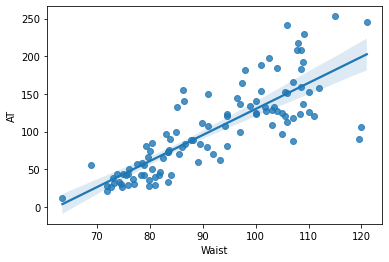

In [10]:
sns.regplot(x='Waist',y='AT',data=data)

In [12]:
#t and p-Values
print(model.tvalues, '\n' , model.pvalues)
#Focus on B1. B1 is slope . Define H0 and H1

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


#Predict for new data point

In [14]:
#Predict for 40,75,120
newdata=pd.Series([40,75,120])

In [15]:
newdata

0     40
1     75
2    120
dtype: int64

In [16]:
data_pred=pd.DataFrame(newdata,columns=['Waist'])

In [17]:
data_pred

,Waist
0,40
1,75
2,120


In [18]:
model.predict(data_pred)# Model- Regression model

0    -77.627112
1     43.432966
2    199.081639
dtype: float64